# Libraries and API_KEY

In [1]:
from langchain.agents import create_pandas_dataframe_agent
from langchain.llms import OpenAI
import pandas as pd
import tabulate
import os
import numpy as np

In [2]:
OPENAI_API_KEY = os.environ.get('OPENAI_API_KEY')

# Preprocesing data

In [3]:
df = pd.read_csv('../DATA/Redbull.csv')
df.head()

,Volunteer_ID,sex,agegrp,bp_before,bp_after,Unnamed: 5
0,1,Male,30-45,143,153,NaN
1,2,Male,30-45,163,170,NaN
2,3,Male,30-45,153,168,NaN
3,4,Male,30-45,153,168,NaN
4,5,Male,30-45,146,161,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Volunteer_ID  120 non-null    int64  
 1   sex           120 non-null    object 
 2   agegrp        120 non-null    object 
 3   bp_before     120 non-null    int64  
 4   bp_after      120 non-null    int64  
 5   Unnamed: 5    0 non-null      float64
dtypes: float64(1), int64(3), object(2)
memory usage: 5.8+ KB


## Cleaning

In [5]:
df.drop(['Unnamed: 5','Volunteer_ID'],axis=1,inplace=True)

In [6]:
df.rename(columns={'agegrp':'Age Group',
                   'bp_before': 'BPM Before',
                   'bp_after': 'BPM After'
                  },inplace=True)

In [7]:
df.head()

,sex,Age Group,BPM Before,BPM After
0,Male,30-45,143,153
1,Male,30-45,163,170
2,Male,30-45,153,168
3,Male,30-45,153,168
4,Male,30-45,146,161


# Agent and LLM

In [8]:
agent = create_pandas_dataframe_agent(OpenAI(temperature=0.9,openai_api_key=OPENAI_API_KEY),df,verbose=True)

## Run and verify

In [9]:
agent.run("1How many age groups are?")



> Entering new AgentExecutor chain...
Thought: I need to count the amount of unique values in the Age Group column
Action: python_repl_ast
Action Input: df['Age Group'].nunique()
Observation: 3
Thought: I now know the final answer
Final Answer: There are 3 age groups.

> Finished chain.


'There are 3 age groups.'

In [10]:
len(df['Age Group'].unique())

3

In [11]:
agent.run("What is the average BPM before?")



> Entering new AgentExecutor chain...
Thought: I should calculate the average BPM before
Action: python_repl_ast
Action Input: df['BPM Before'].mean()
Observation: 156.45
Thought: I now know the final answer
Final Answer: The average BPM before is 156.45.

> Finished chain.


'The average BPM before is 156.45.'

In [12]:
df['BPM Before'].mean()

156.45

In [13]:
agent.run("What is the average BPM before only for men?")



> Entering new AgentExecutor chain...
Thought: I should find the values of BPM Before for all men then take the average.
Action: python_repl_ast
Action Input: df[df['sex'] == 'Male']['BPM Before'].mean()
Observation: 159.26666666666668
Thought: I now know the final answer
Final Answer: The average BPM before for men is 159.27.

> Finished chain.


'The average BPM before for men is 159.27.'

In [14]:
df.groupby('sex').mean().loc['Male','BPM Before']

C:\Users\alarc\AppData\Local\Temp\ipykernel_19564\1228385198.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('sex').mean().loc['Male','BPM Before']


159.26666666666668

In [15]:
agent.run("What is the average BPM before only for 35-year-old men?")



> Entering new AgentExecutor chain...
Thought: I need to find all of the 35-year-old men, then take the average of their BPM Before
Action: python_repl_ast
Action Input: df[(df['Age Group'] == '30-45') & (df['sex'] == 'Male')]['BPM Before'].mean()
Observation: 153.45
Thought: I now know the final answer
Final Answer: 153.45

> Finished chain.


'153.45'

In [16]:
df[(df['sex'] == 'Male') & (df['Age Group'] == '30-45')]['BPM Before'].mean()

153.45



> Entering new AgentExecutor chain...
Thought: I need to plot the results
Action: python_repl_ast
Action Input: df.plot(x='Age Group', y=['BPM Before', 'BPM After'], kind='bar')
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: Bar graph is generated
Final Answer: The following bar graph was generated with age on the x-axis and BPM on the y-axis, with both BPM Before and BPM After appearing in the graph.

> Finished chain.


'The following bar graph was generated with age on the x-axis and BPM on the y-axis, with both BPM Before and BPM After appearing in the graph.'

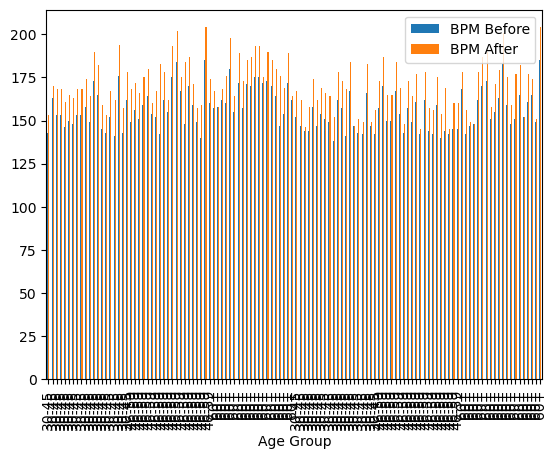

In [17]:
agent.run("Generates a bar graph with age on the x-axis and BPM on the y-axis. Both BPM Before and BPM After should appear")

# Get Fun